# Nonlinear Modeling and Generalization

Thus far, we have illustrated linear regression as “drawing a line through through the data”, 
but this was really a function of our input features.

Though it may seem limited, linear regression algorithms are quite powerful when applied 
to non-linear features of the input data

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def build_plot(file_path, x, y):
    data = pd.read_csv(file_path)
    plt.scatter(data[x], data[y], c='blue', marker='x')
    plt.xlabel(x)
    plt.ylabel(y)
    return plt
    # plt.show()

build_plot('../resources/china_gdp.csv', 'Year', 'Value').show()

If we draw a line through this plot, we will get:

In [ ]:
plt = build_plot('../resources/china_gdp.csv', 'Year', 'Value')
data = pd.read_csv('../resources/china_gdp.csv')
x, y = data['Year'], data['Value']
x_reshaped, y_reshaped = x.values.reshape(-1, 1), y.values.reshape(-1, 1)

from sklearn.linear_model import LinearRegression
import numpy as np

# model = LinearRegression(fit_intercept=True)
# model.fit(x_reshaped, y_reshaped)
# Xnew = np.array([[2025], [2030]])
# print(model.predict(Xnew))

# theta = [ model.coef_[0][0], model.intercept_[0] ]
# print(theta)
theta = [ 100000000000, 1000000000 ]
plt.plot([1960, 2020], [theta[1], 100*theta[0]+theta[1]], 'C1')

Thus far, we have illustrated linear regression as “drawing a line through through the data”, 
but this was really a function of our input features.

Though it may seem limited, linear regression algorithms are quite powerful when applied 
to non-linear features of the input data.

[ 1.75543478 -1.16368549  0.12615956]


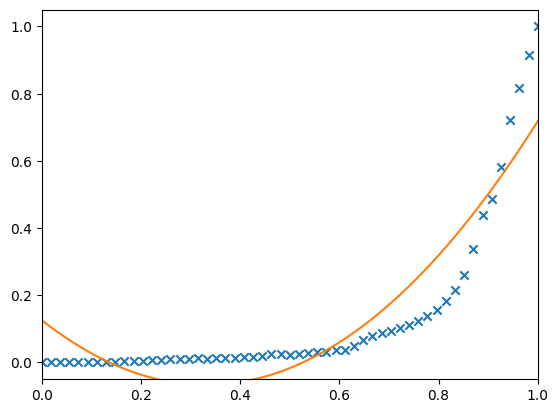

In [3]:
def normalize_data(x):
    x_normalized = (x - min(x)) / (max(x) - min(x))
    return x_normalized

# plt = build_plot('../resources/china_gdp.csv', 'Year', 'Value')
data = pd.read_csv('../resources/china_gdp.csv')
x, y = normalize_data(data['Year']), normalize_data(data['Value'])

def ls_poly(x, y, degree):
    X = np.array([x**i for i in range(degree,-1,-1)]).T
    return np.linalg.solve(X.T @ X, X.T @ y)

def plot_regression_poly(x, y, theta):
    degree = len(theta)-1
    xt0 = np.linspace(0, 1, 400)
    # xt = 2*(xt0 - min_x)/(max_x - min_x) - 1
    Xt = np.array([xt0**i for i in range(degree,-1,-1)]).T
    yt = Xt @ theta
        
    plt.scatter(x, y, marker="x")
    ylim = plt.ylim()
    plt.plot(xt0, yt, 'C1')
    plt.xlim([0,1])
    plt.ylim(ylim)

theta = ls_poly(x, y, 2)
print(theta)
plot_regression_poly(x, y, theta)

[-3.82821144e+02  8.71628929e+02  1.80538473e+02 -2.35749289e+03
  3.01587417e+03 -1.83429512e+03  6.07162763e+02 -1.09108753e+02
  9.84543948e+00 -3.38121179e-01  2.42100867e-03]


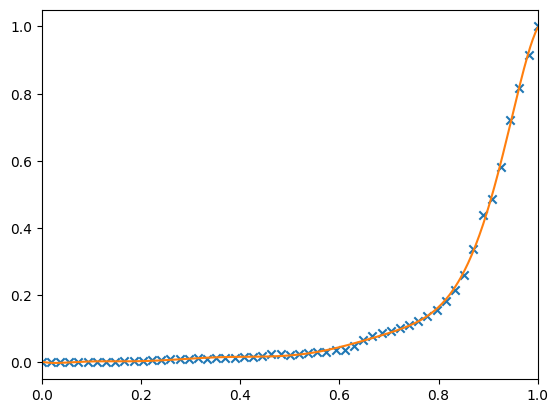

In [6]:
theta = ls_poly(x, y, 10)
print(theta)
plot_regression_poly(x, y, theta)

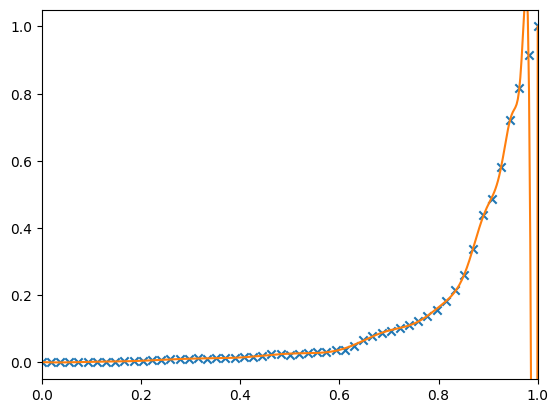

In [5]:
theta = ls_poly(x, y, 100)
# print(theta)
plot_regression_poly(x, y, theta)

## Generalization and overfitting

The problem with the canonical machine learning problem is that we don’t really 
care about minimizing this objective on the given data set.

What we really care about is how well our function will generalize to new examples
that we didn’t use to train the system (but which are drawn from the “same 
distribution” as the examples we used for training)

The higher degree polynomials exhibited overfitting: they actually have very low
loss on the training data, but create functions we don’t expect to generalize well

As model becomes more complex, training loss always decreases; generalization 
loss decreases to a point, then starts to increase

![nonlinear](../resources/ml-nonlinear.png)

Although it is difficult to quantify the true generalization error (i.e., the error of these 
algorithms over the complete distribution of possible examples), we can 
approximate it by holdout **cross-validation**

Basic idea is to split the data set into a training set and a holdout set. Train the algorithm on the training set and evaluate on the holdout set.

We refer to the $\theta$ variables as the *parameters* of the machine learning algorithm.
But there are other quantities that also affect the classifier: degree of polynomial, 
amount of regularization, etc; these are collectively referred to as the 
*hyperparameters* of the algorithm.

Basic idea of cross-validation: use training set to determine the parameters, use 
holdout set to determine the hyperparameters


**k-fold cross-validation:** 

A more involved (but actually slightly more common) version of cross validation
Split data set into $k$ disjoint subsets (folds); train on $k-1$ and evaluate on 
remaining fold; repeat $k$ times, holding out each fold once. Report average error over all held out folds


**Variants**

*Leave-one-out cross-validation*: the limit of k-fold cross-validation, where each 
fold is only a single example (so we are training on all other examples, testing on 
that one example)
[Somewhat surprisingly, for least squares this can be computed more efficiently than k-fold 
cross validation, same complexity solving for the optimal 𝜃 using matrix equation] 

*Stratified cross-validation*: keep an approximately equal percentage of 
positive/negative examples (or any other feature), in each fold

*Warning*: k-fold cross validation is not always better (e.g., in time series prediction, 
you would want to have holdout set all occur after training set)

## Nonlinear classification

In [7]:
import numpy as np
import sklearn.datasets
dat = sklearn.datasets.load_breast_cancer()

ix = np.where(dat["feature_names"] == "mean area")[0][0]
iy = np.where(dat["feature_names"] == "mean concave points")[0][0]

X = np.asarray([dat["data"][:,ix], dat["data"][:,iy]]).T
y = (1.*(dat["target"]==np.where(dat["target_names"] == "malignant")[0][0]) +
     -1.*(dat["target"]==np.where(dat["target_names"] == "benign")[0][0]))

In [8]:
def plot_classification_sklearn(model, norm, feat):
    x_range = [0,2600]
    y_range = [0, 0.21]

    # plot classifcation regions
    grid=200
    xx,yy = np.meshgrid(np.linspace(x_range[0], x_range[1], grid),
                        np.linspace(y_range[0], y_range[1], grid))
    X_ = np.array([np.ravel(xx), np.ravel(yy)]).T
    zz = model.decision_function(feat(norm.transform(X_))).reshape(grid,grid)
    cs = plt.contourf(xx,yy,zz, zz,levels=[-float("inf"),0,float("inf")],alpha=0.2,colors=["b","r"])
    plt.contour(cs, colors='k')

    s1 = plt.scatter(dat["data"][:,ix][dat["target"]==1], dat["data"][:,iy][dat["target"]==1], marker='x', color='C0')
    s2 = plt.scatter(dat["data"][:,ix][dat["target"]==0], dat["data"][:,iy][dat["target"]==0], marker='+', color='C3')
    plt.xlim([0,2600])
    plt.ylim([0,0.21])
    plt.xlabel("Mean Area")
    plt.ylabel("Mean Concave Points")
    plt.legend([s1,s2], ['Benign', 'Malignant'])

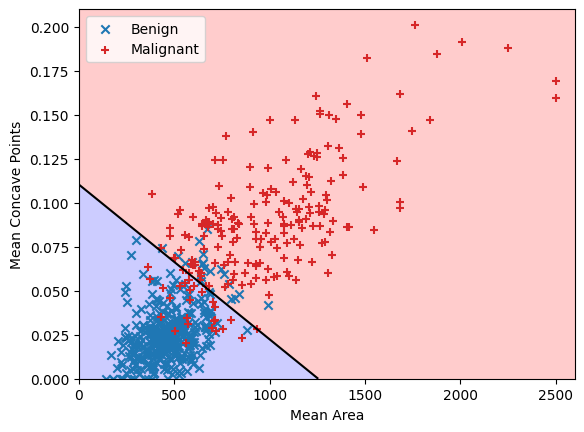

In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

norm = MinMaxScaler(feature_range=(-1,1))
model = SVC(kernel='linear', C = 100.0)
model.fit(norm.fit_transform(X), y)
plot_classification_sklearn(model, norm, lambda x : x)

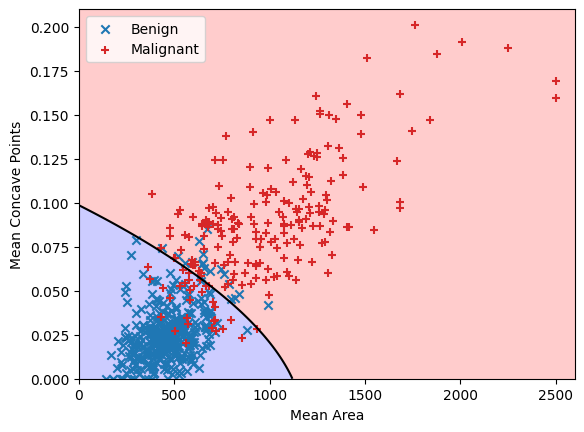

In [10]:
from itertools import combinations_with_replacement

def poly_feat(X,d):
    X_ = np.hstack([X, np.ones((X.shape[0],1))]).T # add ones
    return np.array([np.array(a).prod(axis=0) for a in combinations_with_replacement(X_,d)]).T

Phi = poly_feat(norm.fit_transform(X), 2)
model.fit(Phi, y)
plot_classification_sklearn(model, norm, lambda X : poly_feat(X, 2))

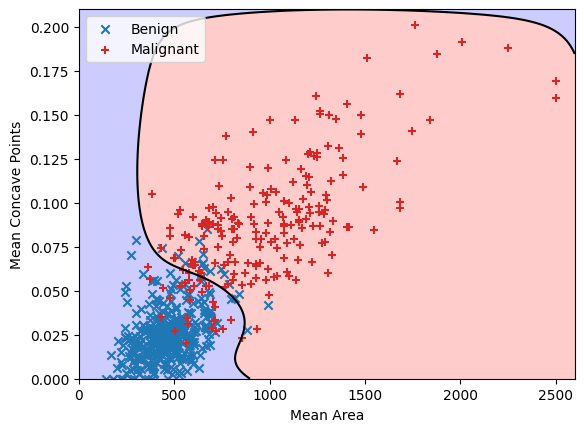

In [11]:
Phi = poly_feat(norm.fit_transform(X), 10)
model.fit(Phi, y)
plot_classification_sklearn(model, norm, lambda X : poly_feat(X, 10))

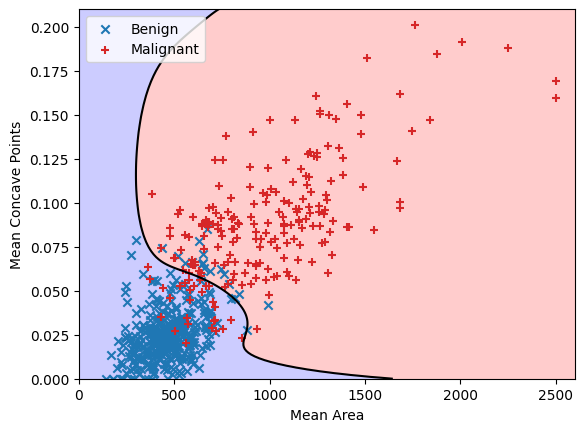

In [12]:
Phi = poly_feat(norm.fit_transform(X), 50)
model.fit(Phi, y)
plot_classification_sklearn(model, norm, lambda X : poly_feat(X, 50))